In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series,DataFrame
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
#Read input file
df1=pd.read_csv("D:\\EDA\\Titanic_test.csv")
df2=pd.read_csv("D:\\EDA\\Titanic_survival.csv")

In [4]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
# Passender id is key to merge. Let's first check the dimension of dataset to take decision on how to combine
print(df1.shape)
print(df2.shape)
#We are safe to merge directly. Only thing you all should keep in mind on matching to correct passenger id. Do not blindly combine one to one mapping

(418, 11)
(418, 2)


In [7]:
# lets check all passenger id of test data is present in survival data. An important data check
df1['PassengerId'].isin(df2['PassengerId']).value_counts()
#We are 100% safe to merge both

True    418
Name: PassengerId, dtype: int64

In [8]:
# combine both dataset, using inner merge, which is default
df1= pd.DataFrame(df1)
df2= pd.DataFrame(df2)
df = pd.merge(df1,df2,on='PassengerId')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [10]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [11]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

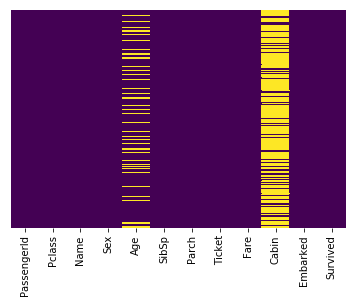

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Here, cabin has lots of missing but we can assume, wherever cabin is missing, it means that passenger has not any cabin., so can dreate a column out of it, cabin Allocated-yes/No

In [13]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


The survival Rate?

In [14]:
df.Survived.value_counts(normalize=True)

0    0.636364
1    0.363636
Name: Survived, dtype: float64

In [15]:
df.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           1.0
male    0           1.0
Name: Survived, dtype: float64

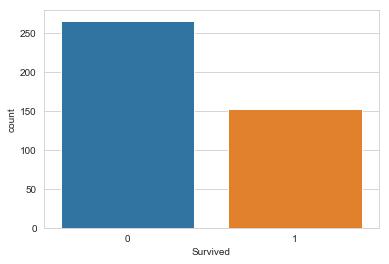

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

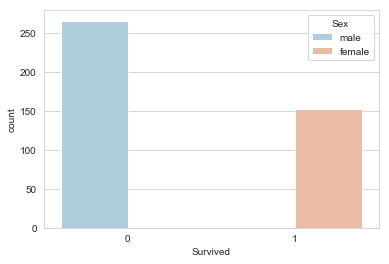

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

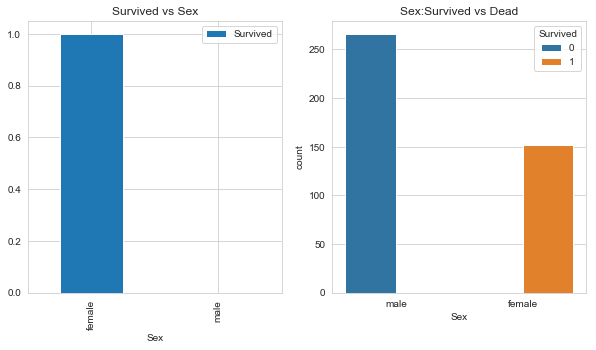

In [18]:
df_resetindex=df.set_index('PassengerId')
f,ax=plt.subplots(1,2,figsize=(10,5))
df_resetindex[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=df_resetindex,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [19]:
#survival rate of people in different Pclass  is
dk= df[['Pclass','Survived']].groupby(['Pclass','Survived']).size()
f=lambda x: x*100 / x.sum()
dk = dk.groupby(level=0).apply(f).reset_index()
dk.columns =['Pclass','Survived','percent']
dk
hr2=dk.where(dk['Survived']>=1)
hr2[hr2['Survived'].notnull()]

,Pclass,Survived,percent
1,1.0,1.0,46.728972
3,2.0,1.0,32.258065
5,3.0,1.0,33.027523


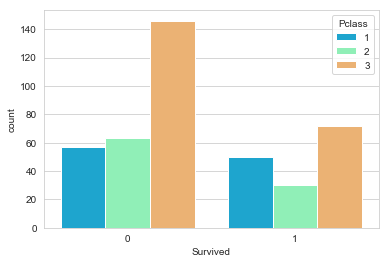

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

In [21]:
df_final=df.drop(['Cabin'], axis=1) #We will drop the cabin as it is of no use for our current analysis

In [22]:
df_final['Title'] = df_final.Name.apply(lambda Name: Name.split(',')[1].split('.')[0].strip())
df_final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,Mrs


In [23]:
df_final.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [24]:
Title_Age = df_final.groupby(df_final['Title']).Age.transform('median')
df_final.Age.fillna(Title_Age,inplace=True)

In [25]:
df_final['Fare'] = df_final.groupby(['Pclass','Embarked'])['Fare'].apply(lambda x: x.fillna(x.mean()))

In [26]:
df_final.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
Title          0
dtype: int64

In [28]:
#check why still age is missing
pd.crosstab(df_final['Title'],df_final['Age'].isnull())

Age,False,True
Title,,
Col,2,0
Dona,1,0
Dr,1,0
Master,21,0
Miss,78,0
Mr,240,0
Mrs,72,0
Ms,0,1
Rev,2,0


In [29]:
# There is only one record with Title "Ms" so Median cannot be applied in that field so applying the median of "Mrs" column

df_final.groupby("Title")["Age"].median()

Title
Col       50.0
Dona      39.0
Dr        53.0
Master     7.0
Miss      22.0
Mr        28.5
Mrs       36.5
Ms         NaN
Rev       35.5
Name: Age, dtype: float64

In [31]:
a=22.0
df_final["Age"].fillna(a,inplace = True) 
df_final.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
Title          0
dtype: int64

In [32]:
df_final.drop('Name',axis=1,inplace=True)
df_final.drop('Ticket',axis=1,inplace=True)
df_final.drop('Title',axis=1,inplace=True)

In [33]:
pd.crosstab([df_resetindex.Embarked,df_resetindex.Pclass],[df_resetindex.Sex,df_resetindex.Survived],margins=True).style.background_gradient(cmap='summer_r')

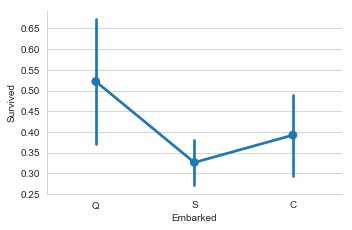

In [34]:
sns.factorplot('Embarked','Survived',data=df_resetindex)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()


The Chances of survival from Port Q is highest.

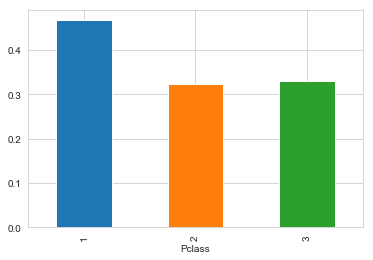

In [35]:
df_resetindex.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.show()

In [36]:
df_resetindex.Pclass.value_counts(normalize=True)

3    0.521531
1    0.255981
2    0.222488
Name: Pclass, dtype: float64

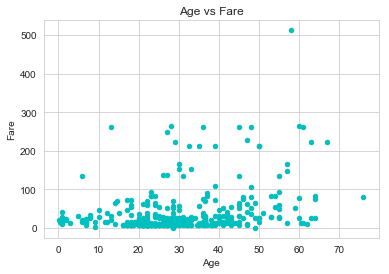

In [37]:
df_final.plot.scatter(x='Age', y='Fare', color='c', title='Age vs Fare')

In [38]:
df_surv = df_final.groupby('Survived').mean()
df_surv

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,1102.620301,2.334586,29.542895,0.379699,0.274436,27.476693
1,1096.789474,2.144737,29.865724,0.565789,0.598684,49.747699


In [39]:
df_sur = df_final.groupby(['Embarked','Survived','Sex']).mean()
df_sur

PassengerId    Pclass        Age     SibSp  \
Embarked Survived Sex                                                  
C        0        male    1083.419355  1.983871  31.596774  0.419355   
         1        female  1112.125000  1.500000  36.012500  0.425000   
Q        0        male    1083.000000  2.818182  30.340909  0.227273   
         1        female  1093.041667  2.916667  24.312500  0.166667   
S        0        male    1111.532967  2.395604  28.746758  0.384615   
         1        female  1090.840909  2.227273  28.586250  0.738636   

                             Parch       Fare  
Embarked Survived Sex                          
C        0        male    0.274194  49.651077  
         1        female  0.550000  92.003230  
Q        0        male    0.045455   9.357386  
         1        female  0.000000  12.424654  
S        0        male    0.302198  22.113028  
         1        female  0.784091  40.719651

In [40]:
df_final[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
3,3,0.250000
4,4,0.250000


In [41]:
df_final[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
4,4,1.000000
3,3,0.666667
2,2,0.606061
1,1,0.538462
7,9,0.500000
0,0,0.305556
5,5,0.000000
6,6,0.000000


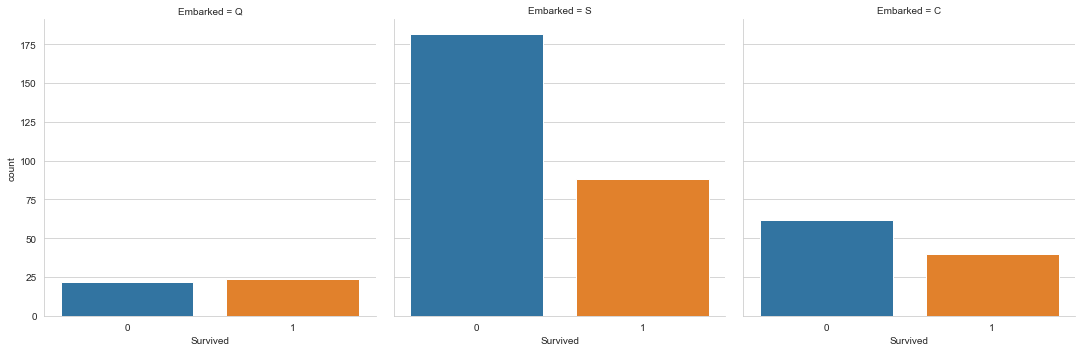

In [42]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_final);
# People who are embarked at S didnot survive while comparing the other places

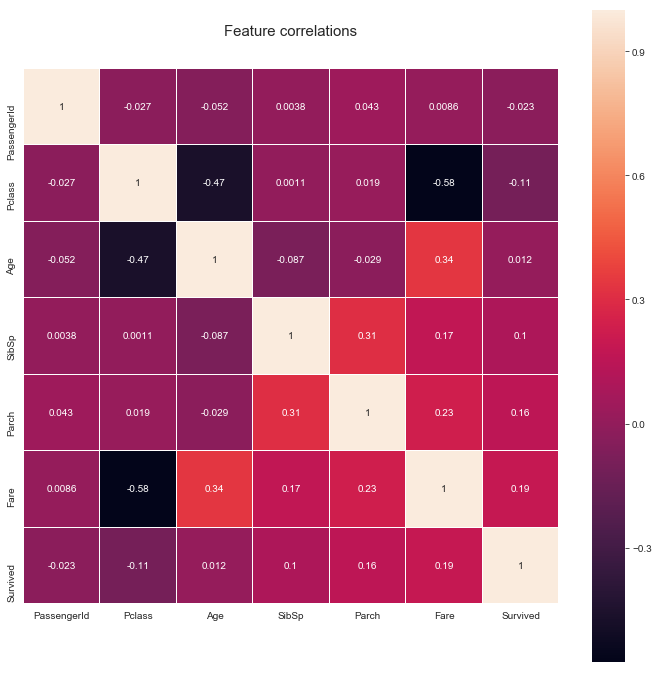

In [43]:
plt.figure(figsize=(12,12))
plt.title('Feature correlations', y=1.05, size=15)
sns.heatmap(df_final.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

* The fate of the Passenger is mainly decided by below factors:
1.Sex of passenger-Male has lowest chance of survival (-100% correlation)     
2.Fare the passenger has paid for the trip-Higher the price they pay higher chances of survival(18% correlation)   
3.Age group they fall into- Working class has the lowest chances of survival(-16% correlation)    
4.People boarding from Embarkment 'S' has the lowest chances of survival(-11% correlation) and 
from  embarkment'Q' hs highest chances of survival(12% correlation)
#### please note, i have not worked on the insights in detail, you all should give insight for each results shown above.
Happy Learning!!!